In [ ]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

sns.set_theme(style='whitegrid')

In [39]:
# Download latest version
path = kagglehub.dataset_download("arshid/iris-flower-dataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/dut/.cache/kagglehub/datasets/arshid/iris-flower-dataset/versions/1


The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

![https://content.codecademy.com/programs/machine-learning/k-means/iris.svg](https://content.codecademy.com/programs/machine-learning/k-means/iris.svg)

Source image:https://content.codecademy.com/programs/machine-learning/k-means/iris.svg

[UCI Machine Learning Repository – Iris Dataset](https://archive.ics.uci.edu/ml/datasets/iris)

Features

| Feature | Description |
|--------|-------------|
| 1 | **Sepal Length** (cm) |
| 2 | **Sepal Width** (cm) |
| 3 | **Petal Length** (cm) |
| 4 | **Petal Width** (cm) |

Target Class (Species)

| Class Label | Species |
|-------------|---------|
| 1 | **Iris Setosa** |
| 2 | **Iris Versicolor** |
| 3 | **Iris Virginica** |

# Data Overview

In [40]:
iris = pd.read_csv(f"{path}/Iris.csv")
x = iris.iloc[:, [0, 1, 2, 3]].values

In [41]:
iris.info()
iris[0:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
# Frequency distribution of species"
iris_outcome = pd.crosstab(index=iris["species"],  # Make a crosstab
                              columns="count")      # Name the count column

iris_outcome

col_0,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [43]:
iris_setosa=iris.loc[iris["species"]=="Iris-setosa"]
iris_virginica=iris.loc[iris["species"]=="Iris-virginica"]
iris_versicolor=iris.loc[iris["species"]=="Iris-versicolor"]

**Distribution plots**

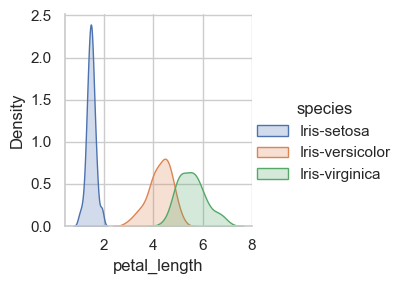

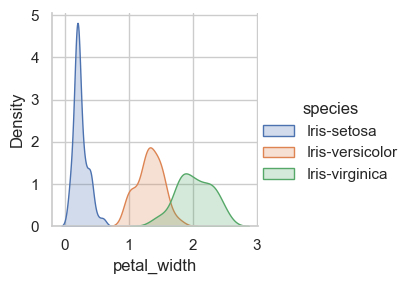

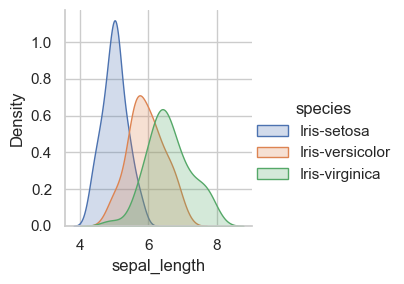

In [44]:
sns.FacetGrid(iris, hue="species", height=3).map(sns.kdeplot, "petal_length", fill=True).add_legend()
sns.FacetGrid(iris, hue="species", height=3).map(sns.kdeplot, "petal_width", fill=True).add_legend()
sns.FacetGrid(iris, hue="species", height=3).map(sns.kdeplot, "sepal_length", fill=True).add_legend()
plt.show()

**Box plot**

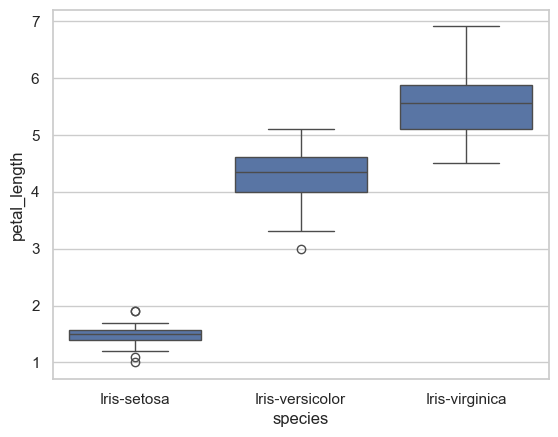

In [45]:
sns.boxplot(x="species",y="petal_length",data=iris)
plt.show()

**Violin plot**

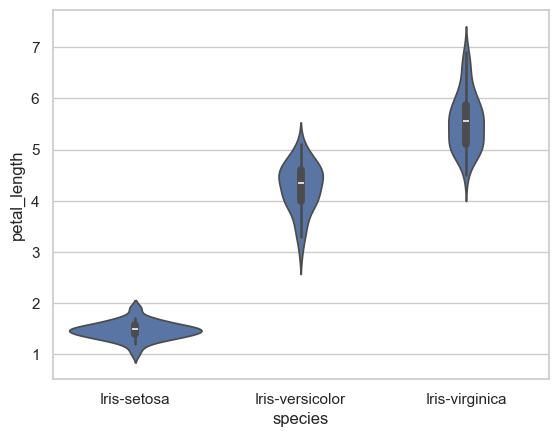

In [46]:
sns.violinplot(x="species",y="petal_length",data=iris)
plt.show()

**Scatter plot**


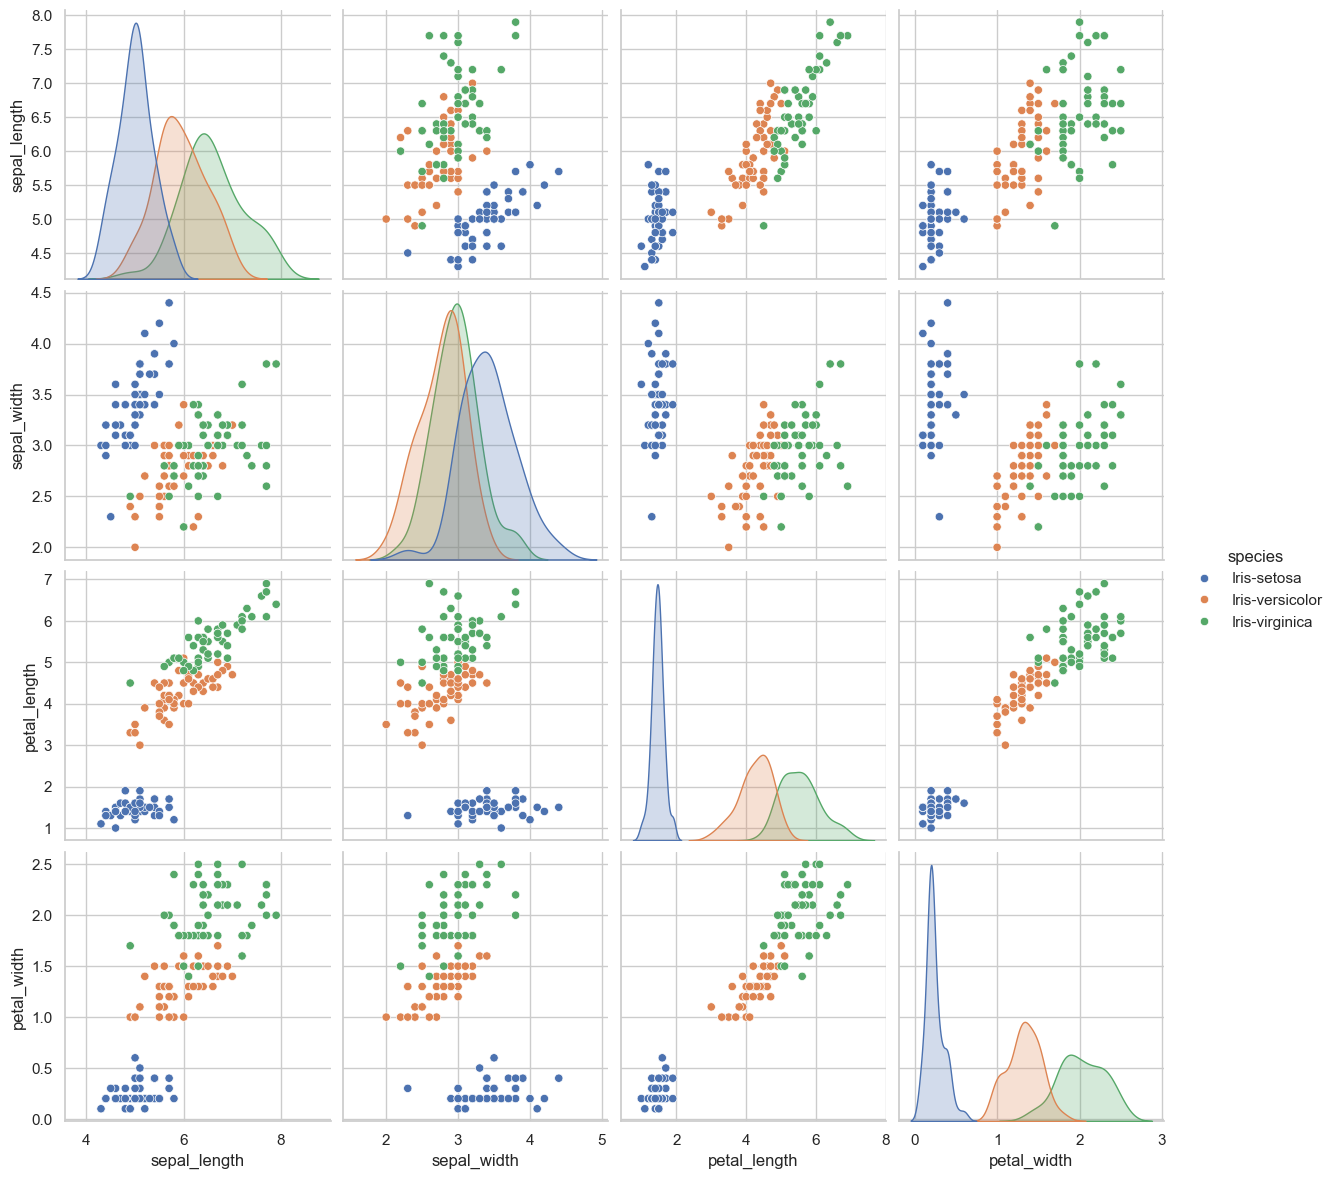

In [47]:
sns.set_style("whitegrid")
sns.pairplot(iris, hue="species", height=3)
plt.show()

# K-Means

[K-means](http://https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/) is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.

## How to Implementing K-Means Clustering ?

* Choose the number of clusters k
* Select k random points from the data as centroids
* Assign all the points to the closest cluster centroid
* Recompute the centroids of newly formed clusters
* Repeat steps 3 and 4

In [48]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

## Using the elbow method to determine the optimal number of clusters for k-means clustering

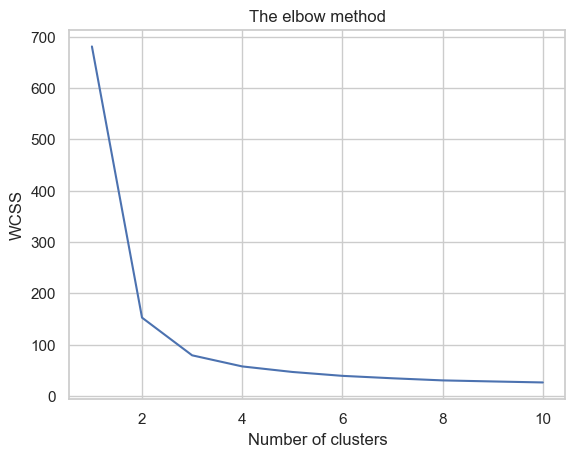

In [12]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

## Implementing K-Means Clustering

In [13]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

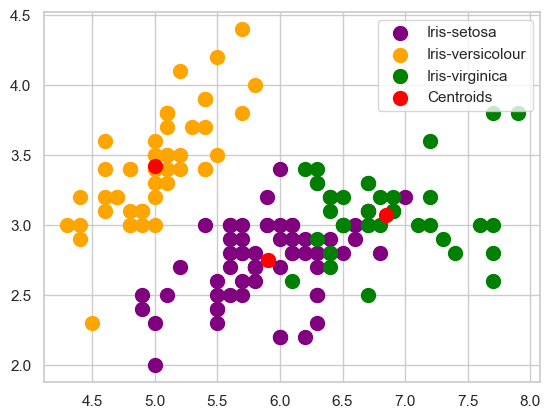

In [14]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

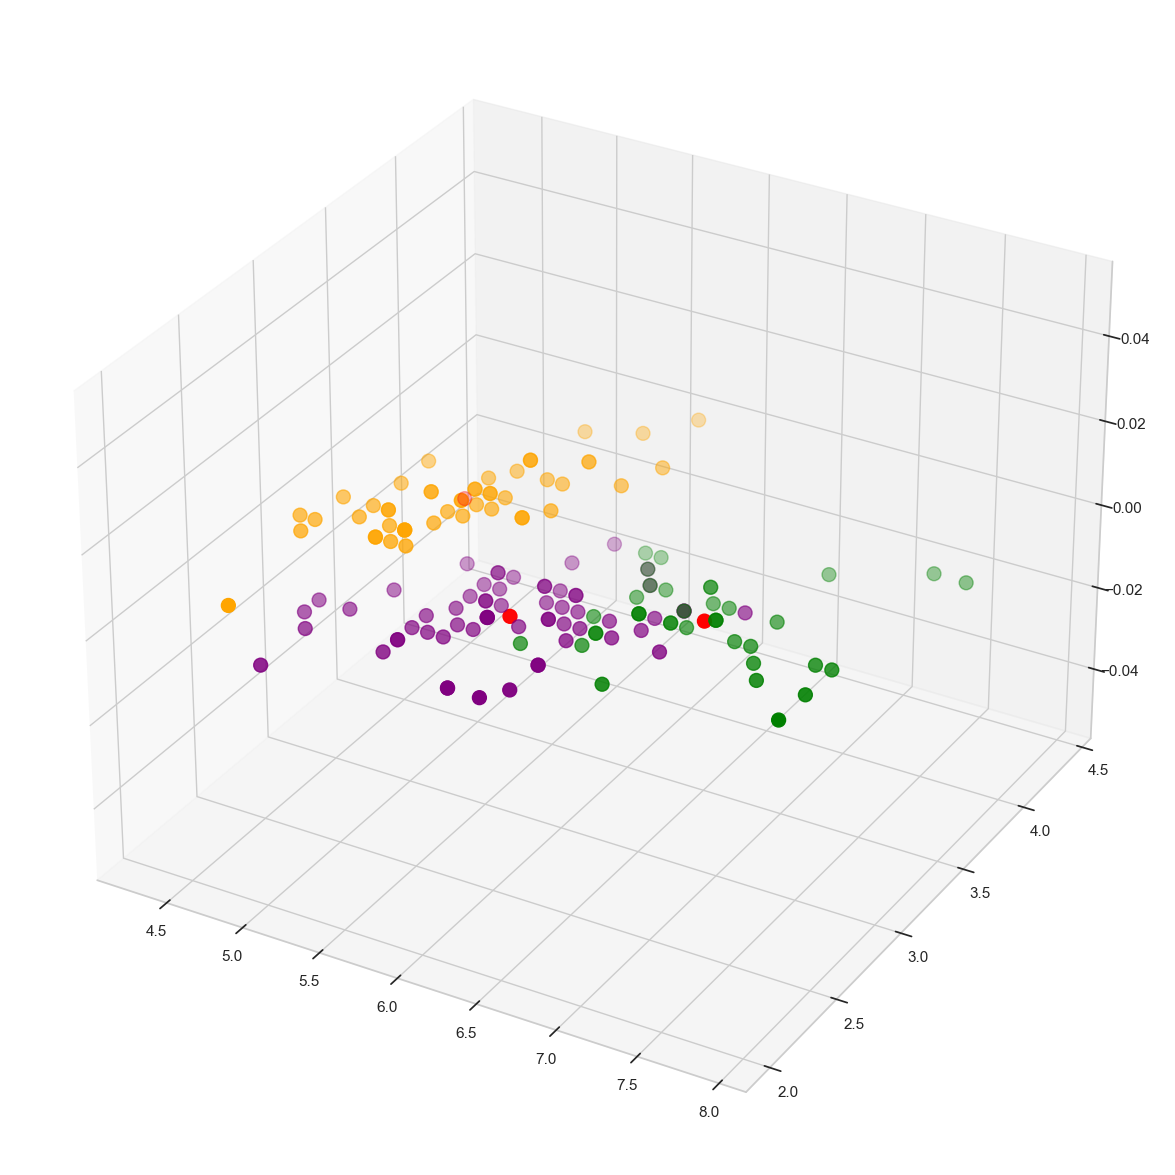

In [15]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.show()

# ML
Goal: classify Iris species. Two models: Logistic Regression (interpretable) and Random Forest.

## Train/test split and preprocessing
- Impute (median) + scale numerics (all features)
- Stratified split to preserve class ratios


In [24]:
y = iris['species']
X = iris.drop(columns=['species'])
num_cols = X.columns.tolist()

preprocess = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
    ]), num_cols)
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Models
- Logistic Regression: linear baseline, coefficients interpretable
- Random Forest: nonlinear; handles interactions; gives feature importances


In [32]:
log_reg = Pipeline([
    ('prep', preprocess),
    ('clf', LogisticRegression(max_iter=500))
])

rf = Pipeline([
    ('prep', preprocess),
    ('rf', RandomForestClassifier(n_estimators=200, random_state=42))
])

### Fit and evaluate
- Shows precision/recall/F1 per class and confusion matrices.


=== LogReg ===
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



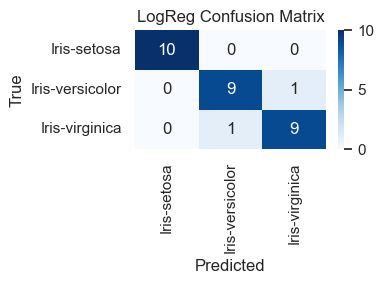

=== RF ===
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.82      0.90      0.86        10
 Iris-virginica       0.89      0.80      0.84        10

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30



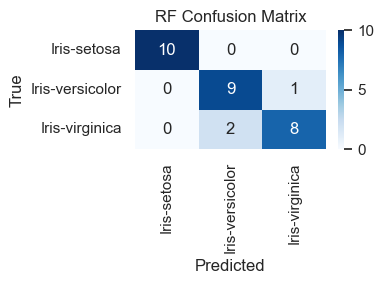

In [34]:
results = {}
for name, model in [('LogReg', log_reg), ('RF', rf)]:
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    report = classification_report(y_test, preds, output_dict=True)
    cm = confusion_matrix(y_test, preds, labels=sorted(y.unique()))

    results[name] = {'model': model, 'preds': preds, 'report': report, 'cm': cm}

    print(f'=== {name} ===')
    print(classification_report(y_test, preds))

    fig, ax = plt.subplots(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()), ax=ax)
    ax.set_title(f'{name} Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    plt.tight_layout()
    plt.show()

### Feature importance
- Logistic regression coefficients (direction/magnitude per class)
- Random Forest importances (overall influence)


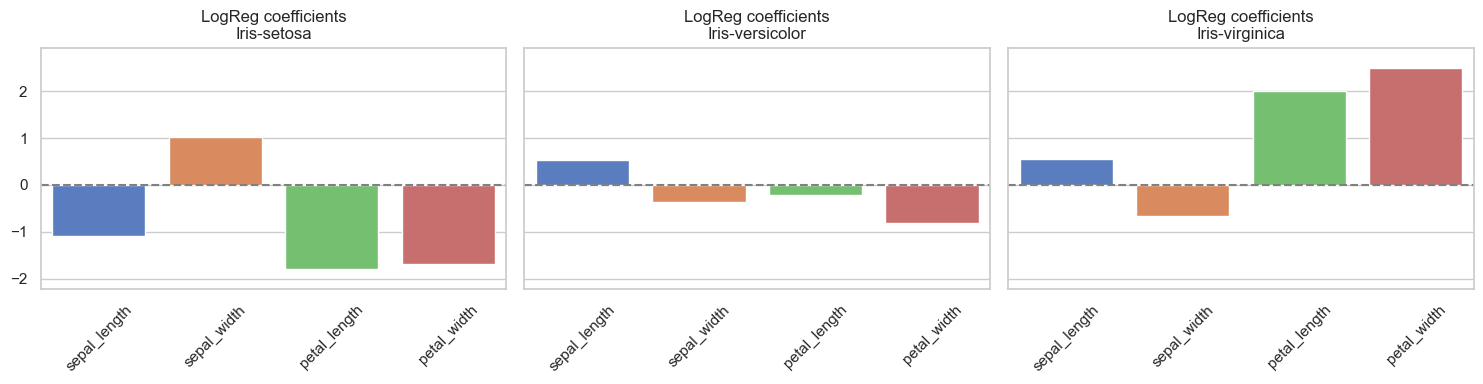

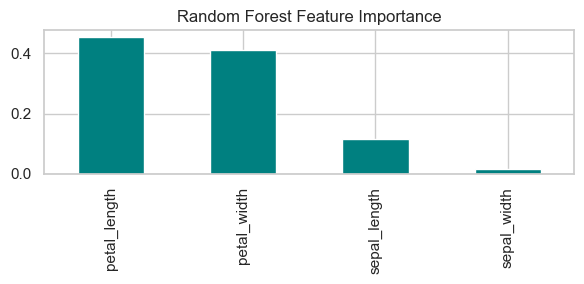

In [35]:
# Logistic regression coefficients (side-by-side)
log_model = results['LogReg']['model'].named_steps['clf']
coef = log_model.coef_
classes = log_model.classes_

n = len(classes)
ymin, ymax = coef.min(), coef.max()
margin = (ymax - ymin) * 0.1 if ymax > ymin else 1.0

fig, axes = plt.subplots(1, n, figsize=(5*n, 4), sharey=True)
if n == 1:
    axes = [axes]

for ax, cls, coefs in zip(axes, classes, coef):
    sns.barplot(x=num_cols, y=coefs, ax=ax, palette='muted', hue=num_cols, legend=False)
    ax.set_title(f'LogReg coefficients\n{cls}')
    ax.axhline(0, color='gray', linestyle='--')
    ax.set_ylim(ymin - margin, ymax + margin)
    ax.set_xticks(range(len(num_cols)))
    ax.set_xticklabels(num_cols, rotation=45)

plt.tight_layout()
plt.show()

# Random Forest importances
rf_model = results['RF']['model'].named_steps['rf']
importances = pd.Series(rf_model.feature_importances_, index=num_cols)
plt.figure(figsize=(6,3))
importances.sort_values(ascending=False).plot.bar(color='teal')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()

## Takeaways
- Petal length/width dominate; sepal features contribute less.
- Use LogReg for interpretable coefficients; RF for a strong nonlinear baseline.


# Original notebook — sources & inspiration

This analysis was inspired by the following Kaggle notebook: [**K-Means Clustering of Iris Dataset — Kaggle Notebook**](https://www.kaggle.com/code/khotijahs1/k-means-clustering-of-iris-dataset/notebook?select=IRIS.csv)